**AIRLINE TRAFFIC DELAY ANALYSIS**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df=pd.read_csv('Airline Traffic Analysis.csv')

In [3]:
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,01/01/19,9E,3280,GNV,ATL,601.0,1.0,22.0,623.0,714.0,8.0,722.0,-1.0,51.0,300,NaN,NaN,NaN,NaN,NaN
1,01/01/19,9E,3281,MSP,CVG,1359.0,-5.0,15.0,1414.0,1629.0,4.0,1633.0,-36.0,75.0,596,NaN,NaN,NaN,NaN,NaN
2,01/01/19,9E,3282,DTW,CVG,1215.0,-5.0,18.0,1233.0,1323.0,6.0,1329.0,-16.0,50.0,229,NaN,NaN,NaN,NaN,NaN
3,01/01/19,9E,3283,TLH,ATL,1521.0,-6.0,14.0,1535.0,1618.0,7.0,1625.0,-14.0,43.0,223,NaN,NaN,NaN,NaN,NaN
4,01/01/19,9E,3284,ATL,FSM,1847.0,-15.0,18.0,1905.0,1935.0,5.0,1940.0,-25.0,90.0,579,NaN,NaN,NaN,NaN,NaN


In [5]:
# First 5 observationa
pd.set_option('display.max_columns', None)
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,01/01/19,9E,3280,GNV,ATL,601.0,1.0,22.0,623.0,714.0,8.0,722.0,-1.0,51.0,300,NaN,NaN,NaN,NaN,NaN
1,01/01/19,9E,3281,MSP,CVG,1359.0,-5.0,15.0,1414.0,1629.0,4.0,1633.0,-36.0,75.0,596,NaN,NaN,NaN,NaN,NaN
2,01/01/19,9E,3282,DTW,CVG,1215.0,-5.0,18.0,1233.0,1323.0,6.0,1329.0,-16.0,50.0,229,NaN,NaN,NaN,NaN,NaN
3,01/01/19,9E,3283,TLH,ATL,1521.0,-6.0,14.0,1535.0,1618.0,7.0,1625.0,-14.0,43.0,223,NaN,NaN,NaN,NaN,NaN
4,01/01/19,9E,3284,ATL,FSM,1847.0,-15.0,18.0,1905.0,1935.0,5.0,1940.0,-25.0,90.0,579,NaN,NaN,NaN,NaN,NaN


In [6]:
# Last 5 observations in the dataset
df.tail()

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1048570,25/02/19,DL,1799,ATL,MDW,2042.0,2.0,13.0,2055.0,2125.0,5.0,2130.0,-10.0,90.0,591,NaN,NaN,NaN,NaN,NaN
1048571,25/02/19,DL,1800,LAS,JFK,1657.0,6.0,16.0,1713.0,30.0,17.0,47.0,-10.0,257.0,2248,NaN,NaN,NaN,NaN,NaN
1048572,25/02/19,DL,1801,ATL,RIC,731.0,6.0,15.0,746.0,845.0,5.0,850.0,-5.0,59.0,481,NaN,NaN,NaN,NaN,NaN
1048573,25/02/19,DL,1801,RIC,ATL,939.0,-1.0,9.0,948.0,1107.0,6.0,1113.0,-17.0,79.0,481,NaN,NaN,NaN,NaN,NaN
1048574,25/02/19,DL,1802,SJC,MSP,1331.0,31.0,11.0,1342.0,1844.0,7.0,1851.0,11.0,182.0,1575,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(1048575, 20)

In [8]:
df.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')

There are 1048575 rows and 20 columns.

In [9]:
#drop the entries
#df = df[:8000]

Since  there are about 1048575 observations, we are considering to drop some entries randomly.

In [10]:
# gives basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1048575 non-null  object 
 1   OP_UNIQUE_CARRIER    1048575 non-null  object 
 2   OP_CARRIER_FL_NUM    1048575 non-null  int64  
 3   ORIGIN               1048575 non-null  object 
 4   DEST                 1048575 non-null  object 
 5   DEP_TIME             1018801 non-null  float64
 6   DEP_DELAY            1018794 non-null  float64
 7   TAXI_OUT             1018283 non-null  float64
 8   WHEELS_OFF           1018283 non-null  float64
 9   WHEELS_ON            1017307 non-null  float64
 10  TAXI_IN              1017307 non-null  float64
 11  ARR_TIME             1017307 non-null  float64
 12  ARR_DELAY            1015257 non-null  float64
 13  AIR_TIME             1015257 non-null  float64
 14  DISTANCE             1048575 non-null  int64  
 15

In [11]:
# data types
df.dtypes

FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
ARR_TIME               float64
ARR_DELAY              float64
AIR_TIME               float64
DISTANCE                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

There are 4 string valued columns and others are numerical.

In [12]:
# null sets in dataset
df.isna().sum()

FL_DATE                     0
OP_UNIQUE_CARRIER           0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
DEP_TIME                29774
DEP_DELAY               29781
TAXI_OUT                30292
WHEELS_OFF              30292
WHEELS_ON               31268
TAXI_IN                 31268
ARR_TIME                31268
ARR_DELAY               33318
AIR_TIME                33318
DISTANCE                    0
CARRIER_DELAY          838614
WEATHER_DELAY          838614
NAS_DELAY              838614
SECURITY_DELAY         838614
LATE_AIRCRAFT_DELAY    838614
dtype: int64

1)14 columns do have missing values


2)FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN, DEST,DISTANCE do not have missing values.

In [13]:
df[df.duplicated()]

,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


There are no duplicate columns in the dataset.

In [14]:
# describtion about dataset
df.describe()

,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.048575e+06,1.018801e+06,1.018794e+06,1.018283e+06,1.018283e+06,1.017307e+06,1.017307e+06,1.017307e+06,1.015257e+06,1.015257e+06,1.048575e+06,209961.000000,209961.000000,209961.000000,209961.000000,209961.000000
mean,2.534272e+03,1.333366e+03,1.142399e+01,1.839595e+01,1.359672e+03,1.479110e+03,7.661734e+00,1.484032e+03,6.317031e+00,1.130458e+02,7.974970e+02,20.359519,4.651531,17.813132,0.123128,25.875867
std,1.818309e+03,4.962407e+02,5.146396e+01,1.104471e+01,4.966360e+02,5.213240e+02,6.005196e+00,5.255593e+02,5.401088e+01,7.155141e+01,5.891674e+02,66.568985,39.469136,39.580174,4.456721,52.530756
min,1.000000e+00,1.000000e+00,-5.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.400000e+01,4.000000e+00,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.760000e+02,9.210000e+02,-6.000000e+00,1.200000e+01,9.380000e+02,1.059000e+03,4.000000e+00,1.103000e+03,-1.500000e+01,6.100000e+01,3.630000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.113000e+03,1.329000e+03,-2.000000e+00,1.500000e+01,1.344000e+03,1.513000e+03,6.000000e+00,1.517000e+03,-6.000000e+00,9.500000e+01,6.400000e+02,0.000000,0.000000,5.000000,0.000000,1.000000
75%,3.896000e+03,1.739000e+03,7.000000e+00,2.100000e+01,1.754500e+03,1.915000e+03,9.000000e+00,1.920000e+03,9.000000e+00,1.430000e+02,1.038000e+03,16.000000,0.000000,21.000000,0.000000,31.000000
max,7.439000e+03,2.400000e+03,2.672000e+03,2.270000e+02,2.400000e+03,2.400000e+03,2.820000e+02,2.400000e+03,2.649000e+03,6.910000e+02,4.983000e+03,2592.000000,1521.000000,1516.000000,816.000000,2206.000000


1) The mean values departure time delay is greater than arrival time delay, delay beacuse of wheather, Security delay, NAS delay.


2) Taxi out time is greater than taxi  in time.

In [16]:
# Display number of destinations in the dataset
df['DEST'].nunique()

346

In [17]:
# Display number of origins in the datset
df['ORIGIN'].nunique()

346

There are 293 airports from where the flight starts (ORIGIN) and 292 destination (DEST) airports.

In [18]:
#display origin airports
df['ORIGIN'].unique()

array(['GNV', 'MSP', 'DTW', 'TLH', 'ATL', 'DAY', 'JAN', 'LGA', 'JAX',
       'BMI', 'CAK', 'PHL', 'JFK', 'AGS', 'LIT', 'IND', 'EYW', 'CAE',
       'CWA', 'TRI', 'BOS', 'MGM', 'MDT', 'MKE', 'TVC', 'FSM', 'BHM',
       'PIA', 'CVG', 'GTR', 'SDF', 'BNA', 'SAT', 'LFT', 'MSN', 'DSM',
       'EVV', 'ABE', 'DCA', 'BWI', 'ILM', 'TYS', 'LEX', 'CLE', 'ELM',
       'EWN', 'PHF', 'SHV', 'CSG', 'TUL', 'BDL', 'DFW', 'RIC', 'RAP',
       'PIT', 'CRW', 'GPT', 'CHA', 'OMA', 'IAD', 'RDU', 'SAV', 'GRR',
       'BTV', 'LAN', 'OAJ', 'AEX', 'CHO', 'CHS', 'HRL', 'ORF', 'MOT',
       'HSV', 'MCO', 'BTR', 'LAX', 'ORD', 'PHX', 'MIA', 'CMH', 'SFO',
       'SEA', 'STL', 'CLT', 'LAS', 'OAK', 'BUF', 'FLL', 'SJU', 'ALB',
       'PWM', 'SMF', 'MHT', 'TPA', 'EGE', 'OGG', 'HNL', 'MSY', 'IAH',
       'KOA', 'DEN', 'SAN', 'TUS', 'SJC', 'PBI', 'SNA', 'GRI', 'SLC',
       'FAT', 'EWR', 'JAC', 'MCI', 'PNS', 'ELP', 'AUS', 'ABQ', 'PSP',
       'MEM', 'PDX', 'ACT', 'ABI', 'DRT', 'GSO', 'BIL', 'AVP', 'CLL',
       'CID', 'CRP',

In [19]:
#display destination airports
df['DEST'].unique()

array(['ATL', 'CVG', 'FSM', 'MSP', 'LGA', 'BMI', 'DAY', 'DTW', 'RIC',
       'EWR', 'AGS', 'OAJ', 'GNV', 'EYW', 'CWA', 'CAE', 'MGM', 'BNA',
       'LNK', 'TVC', 'PIA', 'BHM', 'AVP', 'LAN', 'TYS', 'PIT', 'JAX',
       'GTR', 'BOS', 'MSN', 'JFK', 'DSM', 'EVV', 'MDT', 'OMA', 'AVL',
       'SHV', 'ILM', 'EWN', 'GTF', 'RDU', 'LEX', 'ABE', 'SDF', 'MYR',
       'PWM', 'SYR', 'CSG', 'ELM', 'HSV', 'TUL', 'GRB', 'TLH', 'CRW',
       'TRI', 'LIT', 'GRR', 'IND', 'GPT', 'GSO', 'CHA', 'IAD', 'JAN',
       'ROC', 'TPA', 'CLE', 'AEX', 'BUF', 'CHO', 'BWI', 'BTV', 'HRL',
       'PHF', 'CHS', 'ORF', 'SAV', 'SAT', 'LAX', 'SJC', 'DFW', 'ORD',
       'SEA', 'PHX', 'MIA', 'PHL', 'SFO', 'STL', 'CLT', 'SJU', 'DCA',
       'MCO', 'TUS', 'ALB', 'FLL', 'AUS', 'EGE', 'HNL', 'OGG', 'IAH',
       'LAS', 'KOA', 'MSY', 'SAN', 'PDX', 'BOI', 'ATW', 'SPS', 'SLC',
       'FAT', 'JAC', 'MCI', 'PNS', 'ELP', 'SNA', 'ABQ', 'GSP', 'DEN',
       'RNO', 'MHT', 'ABI', 'DRT', 'CMH', 'BIL', 'CLL', 'ALO', 'SUX',
       'SGF', 'CID',

In [20]:
for dataset in df:
    df.loc[df['ARR_DELAY'] <= 15, 'Status'] = 0
    df.loc[df['ARR_DELAY'] >= 15, 'Status'] = 1
    df.loc[df['ARR_DELAY'] >= 60, 'Status'] = 2
    

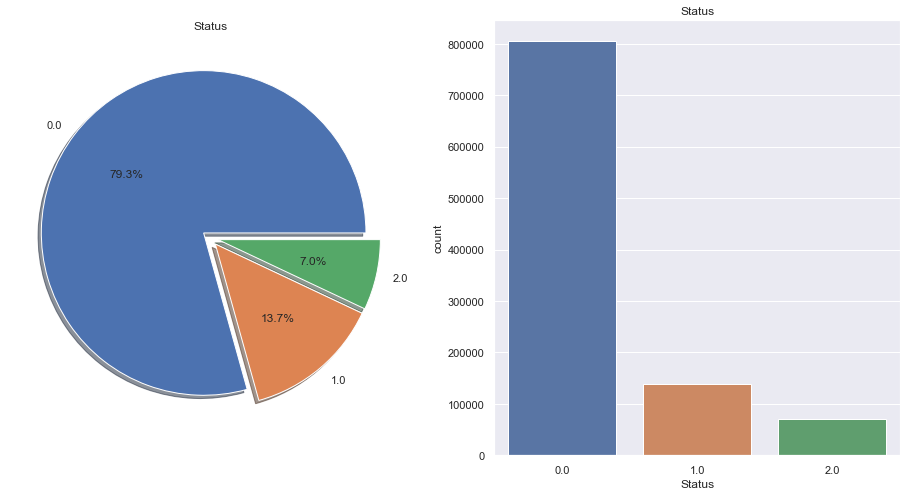

Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2)


In [21]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2)')

79.3% of flights were on right time,7% flights had delays more than 1hr.

In [22]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]

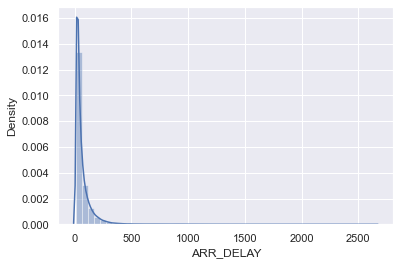

In [23]:
sns.distplot(Delayedflights['ARR_DELAY'])
plt.show()

In [24]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ARR_DELAY'].skew())
print("Kurtosis: %f" % Delayedflights['ARR_DELAY'].kurt())

Skewness: 5.968688
Kurtosis: 57.112654


It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

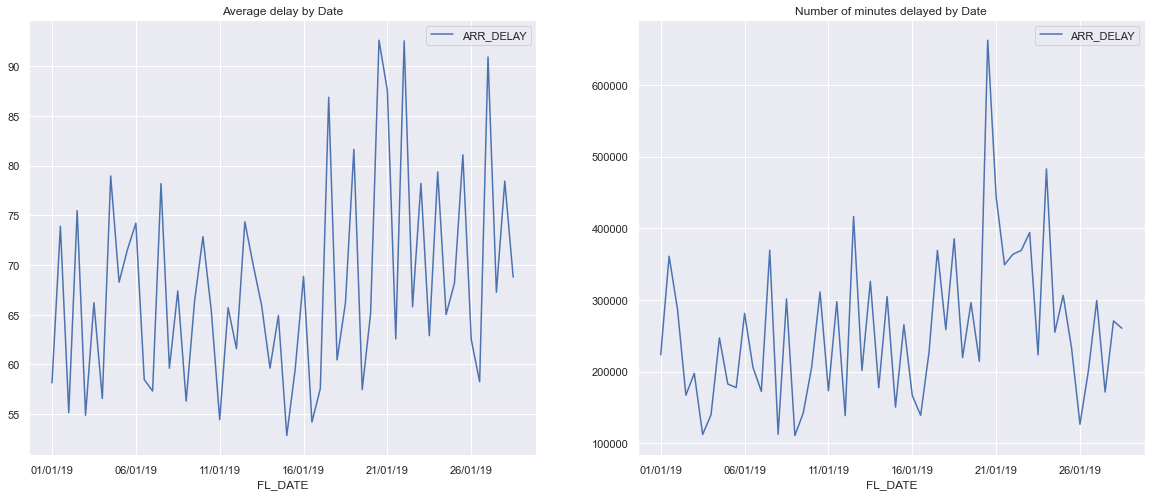

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['FL_DATE','ARR_DELAY']].groupby(['FL_DATE']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by Date')
Delayedflights[['FL_DATE','ARR_DELAY']].groupby(['FL_DATE']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by Date')
plt.show()

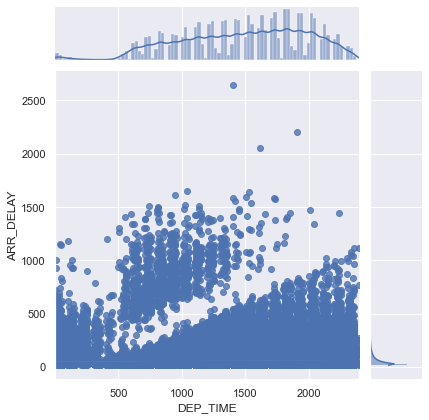

In [26]:
sns.jointplot(x='DEP_TIME',y='ARR_DELAY',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

From the graph as the day goes on, there are more and more delays. On January 21st 2019 highest delay is shown. 26th Jan and 1st Jan delays are less.

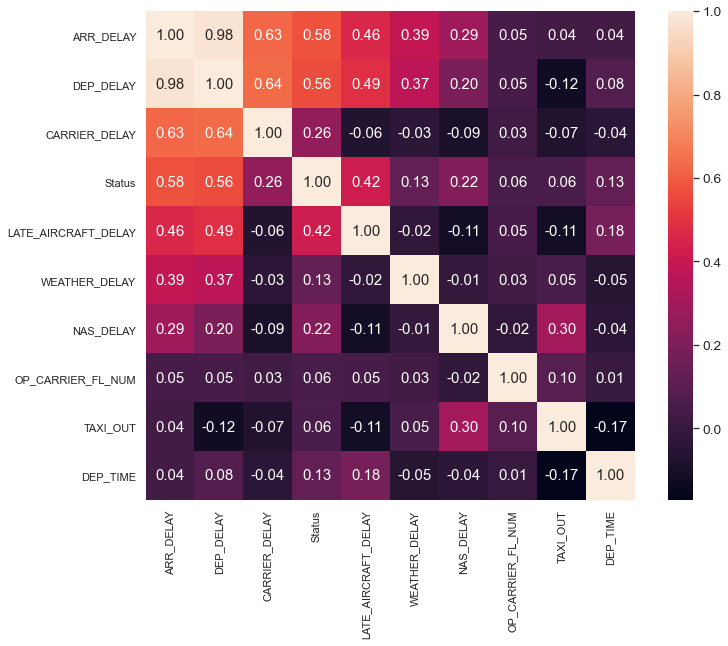

In [27]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ARR_DELAY')['ARR_DELAY'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Here Late Aircraft Delay, Carrier delay,  NAS delay and  Weather delay shows positive correlation with Arrival delay.  

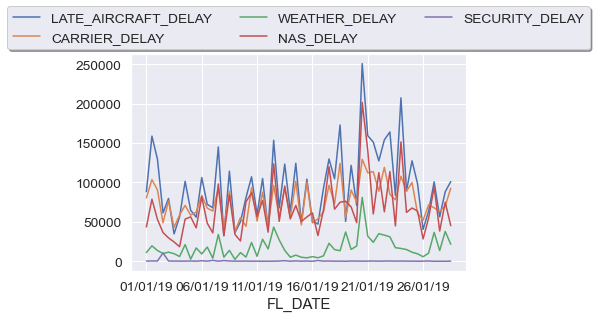

In [28]:
df2 = Delayedflights.filter(['FL_DATE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'	], axis=1)
df2 = df2.groupby('FL_DATE')['LATE_AIRCRAFT_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()



From the graph  Late Aircraft Delay, Carrier Delay and NAS Delay are three main delays and Security delay, Weather delay do not have high impact . The graph corroborates this assumption, showing how those three variables create most of delays during the Month.

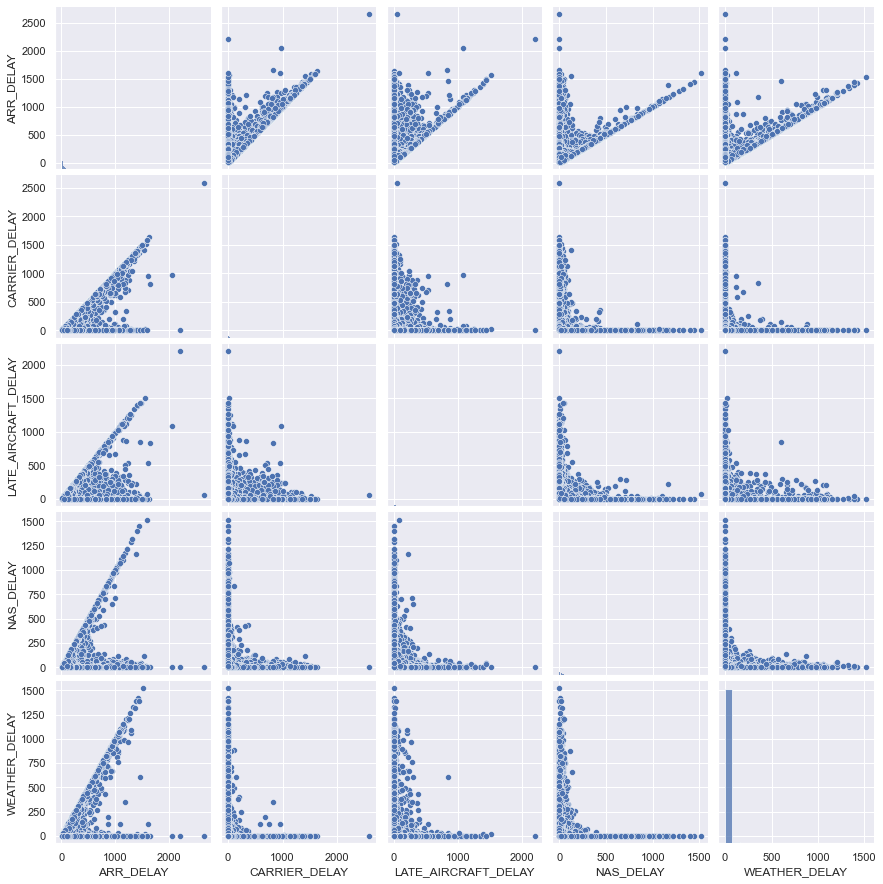

In [29]:
sns.set()
cols = ['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

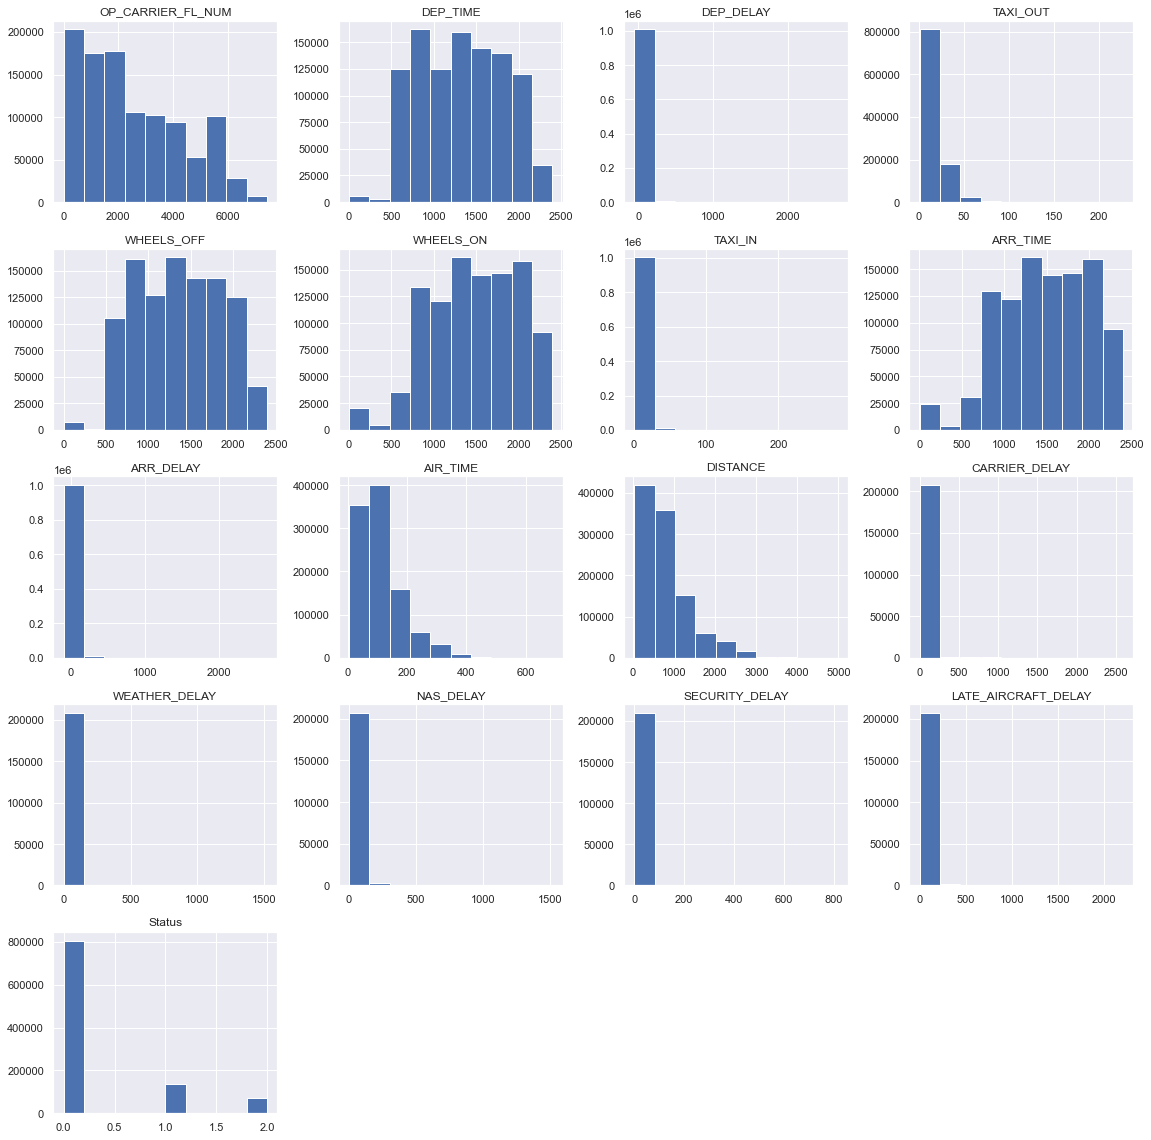

In [30]:
# histogram of the dataset
df.hist(figsize=(16,16))
plt.tight_layout()

In [31]:
print(df['OP_UNIQUE_CARRIER'].value_counts())

WN    195814
AA    139787
DL    132111
OO    117770
UA     84639
YX     46499
MQ     45971
B6     44294
OH     42007
AS     37626
9E     36031
YV     32848
NK     27590
EV     23076
F9     17135
G4     13285
HA     12092
Name: OP_UNIQUE_CARRIER, dtype: int64


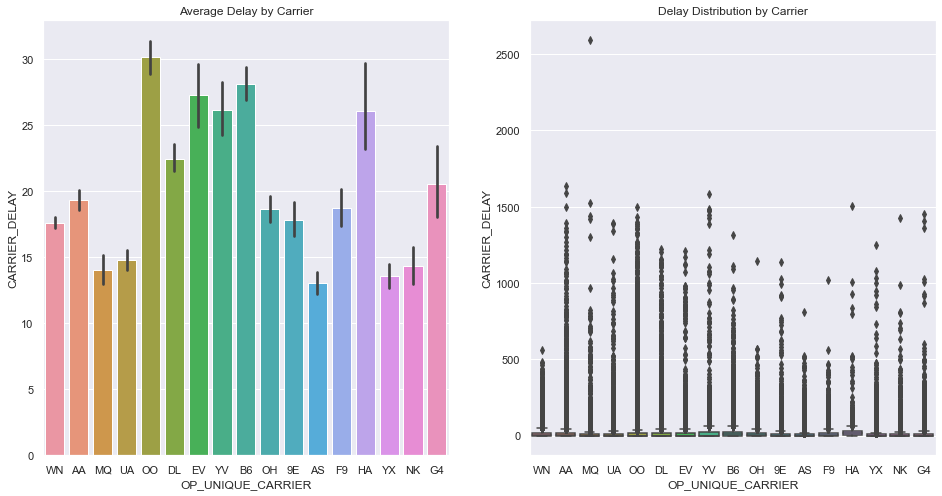

In [32]:
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.barplot('OP_UNIQUE_CARRIER','CARRIER_DELAY', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','EV','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','YX','NK','G4'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('OP_UNIQUE_CARRIER','CARRIER_DELAY', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','EV','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','YX','NK','G4'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()


'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines','YX:Egyptian Airlines','NK: Spirit Airlines America','G4: Allegiant Airlines America'

1)MQ,UA,AS,YX,NK create an low delays which is less than 15 minutes. AS has the lowest delay time.

2)OO,EV,YV,B6,HA has highest delay time greater than 25 minutes. OO delay time is about 30minutes.

In [33]:
Airports = Delayedflights[(Delayedflights.ORIGIN == 'ORD') | (Delayedflights.ORIGIN == 'ATL') |
                               (Delayedflights.ORIGIN == 'DFW') | (Delayedflights.ORIGIN == 'DEN') |
                               (Delayedflights.ORIGIN == 'EWR') | (Delayedflights.ORIGIN == 'LAX') | 
                               (Delayedflights.ORIGIN == 'IAH') | (Delayedflights.ORIGIN == 'PHX') |
                               (Delayedflights.ORIGIN == 'DTW') | (Delayedflights.ORIGIN == 'SFO') | 
                               (Delayedflights.ORIGIN == 'LAS') | (Delayedflights.ORIGIN == 'DEN') |
                               (Delayedflights.ORIGIN == 'ORD') | (Delayedflights.ORIGIN == 'JFK') | 
                               (Delayedflights.ORIGIN == 'CLT') | (Delayedflights.ORIGIN == 'LGA') |
                               (Delayedflights.ORIGIN == 'MCO') | (Delayedflights.ORIGIN == 'MSP') | 
                               (Delayedflights.ORIGIN == 'BOS') | (Delayedflights.ORIGIN == 'PHL')]

print(Airports['ORIGIN'].value_counts())

ORD    14196
DFW     8993
ATL     8869
DEN     7278
LGA     6838
SFO     6305
CLT     6248
LAX     5888
EWR     4991
BOS     4935
MSP     4859
LAS     4698
DTW     4511
IAH     4451
PHX     4399
JFK     4107
MCO     4023
PHL     3053
Name: ORIGIN, dtype: int64


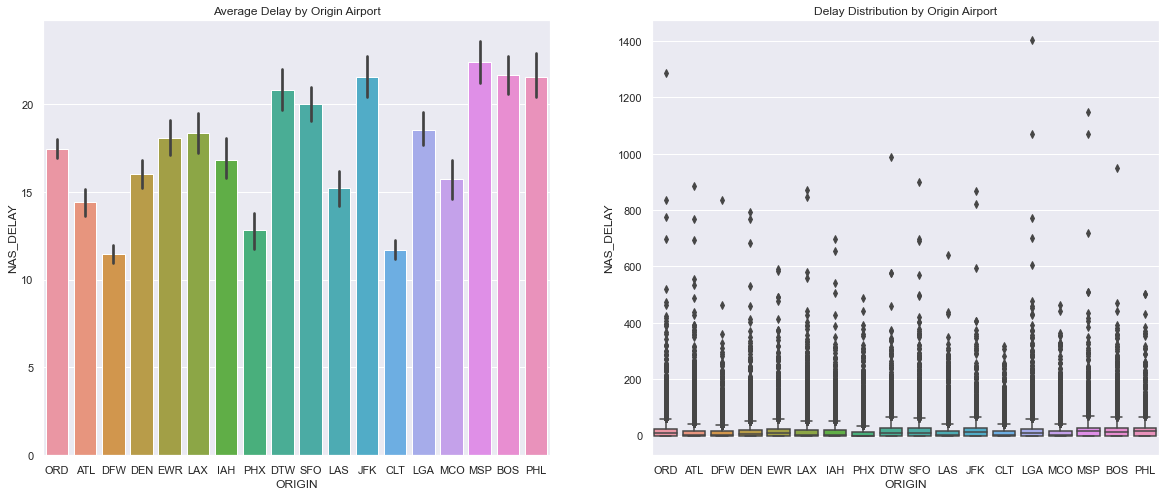

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('ORIGIN','NAS_DELAY', data=Airports,ax=ax[0], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('ORIGIN','NAS_DELAY', data=Airports,ax=ax[1], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

'ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit','SFO: San Francisco','LAS: Las Vegas','JFK: New York','CLT: Charlotte',
       'LGA: La Guardia (NY)','MCO: Orlando','MSP: Minneapolis','BOS Boston','PHL Philadelphia'

1)DTW,JFK,MSP,BOS,PHL shows high NAS delay.

2)DFW,CLT has lowest NAS delay.